In [ ]:
!pip install tensorflow opencv-python matplotlib

In [3]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
aiofiles                     23.2.1
aiohttp                      3.8.5
aiosignal                    1.3.1
altair                       5.3.0
altgraph                     0.17.4
annotated-types              0.6.0
anyio                        3.7.1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.1.0
auto-py-to-exe               2.42.0
awscli                       1.31.8
Babel                        2.15.0
bcrypt                       4.1.3
beautifulsoup4               4.12.3
bleach                       6.1.0
blinker                      1.8.2
boto3                        1.33.8
botocore                     1.33.8
bottle                       0.12

In [1]:
import tensorflow as tf
import os

In [2]:
#Avoid OutOfMemory Error by setting up GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU') #Also to prevent complete GPU Occupation while program runs
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True) #For limiting the memory growth and keep it min

In [3]:
import cv2

In [4]:
data_dir = 'data' #To hold path of data dir

In [5]:
os.listdir(data_dir)

['happy', 'sad']

In [6]:
image_exts = ['jpg', 'jpeg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):                             # FOR LOOP to check DATA dir
    for image in os.listdir(os.path.join(data_dir, image_class)):    # Then check DATA > HAPPY/SAD dir
        image_path = os.path.join(data_dir, image_class, image)      # Lastly check DATA > HAPPY/SAD > IMAGES dir
        try:
            img = cv2.imread(image_path)                             # Check valid IMAGE
            tip = imghdr.what(image_path)                            # Check valid IMAGE EXT 
            if tip not in image_exts:
                print('Image not in ext lise {}'.format(image_path)) # If not valid
                os.remove(image_path)                                # REMOVE
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

Issue with image data\happy\05-12-21-happy-people.jpg
Issue with image data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image data\happy\1-2.jpg
Issue with image data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image data\happy\154006829.jpg
Issue with image data\happy\170404-happy-workers-feature.jpg
Issue with image data\happy\1902539.jpg
Issue with image data\happy\1902540.jpg
Issue with image data\happy\1902587.jpg
Issue with image data\happy\1920px-face-smile.svg_.png.jpg
Issue with image data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image data\happy\60632274._UY200_.jpg
Issue with image data\happy\7-Habits-of-Happy-People-image.jpeg
Issue with image data\happy\7-principles-of-successful-and-happy-people.png
Issue with image data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')   # API for loading DATA from DIRECTORIES along with batching(32), resizing, etc.

Found 305 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()    # To get consecutive batches

In [11]:
batch = data_iterator.next()                # Iterate through batches

In [12]:
# batch[0] - Images (x)
# batch[1] - Label (y)
batch[0]

array([[[[ 92.        , 107.        , 192.        ],
         [ 92.        , 107.        , 192.        ],
         [ 92.        , 107.        , 192.        ],
         ...,
         [ 92.        , 107.        , 192.        ],
         [ 92.        , 107.        , 192.        ],
         [ 92.        , 107.        , 192.        ]],

        [[ 92.        , 107.        , 192.        ],
         [ 92.        , 107.        , 192.        ],
         [ 92.        , 107.        , 192.        ],
         ...,
         [ 92.        , 107.        , 192.        ],
         [ 92.        , 107.        , 192.        ],
         [ 92.        , 107.        , 192.        ]],

        [[ 92.        , 107.        , 192.        ],
         [ 92.        , 107.        , 192.        ],
         [ 92.        , 107.        , 192.        ],
         ...,
         [ 92.        , 107.        , 192.        ],
         [ 92.        , 107.        , 192.        ],
         [ 92.        , 107.        , 192.        ]],

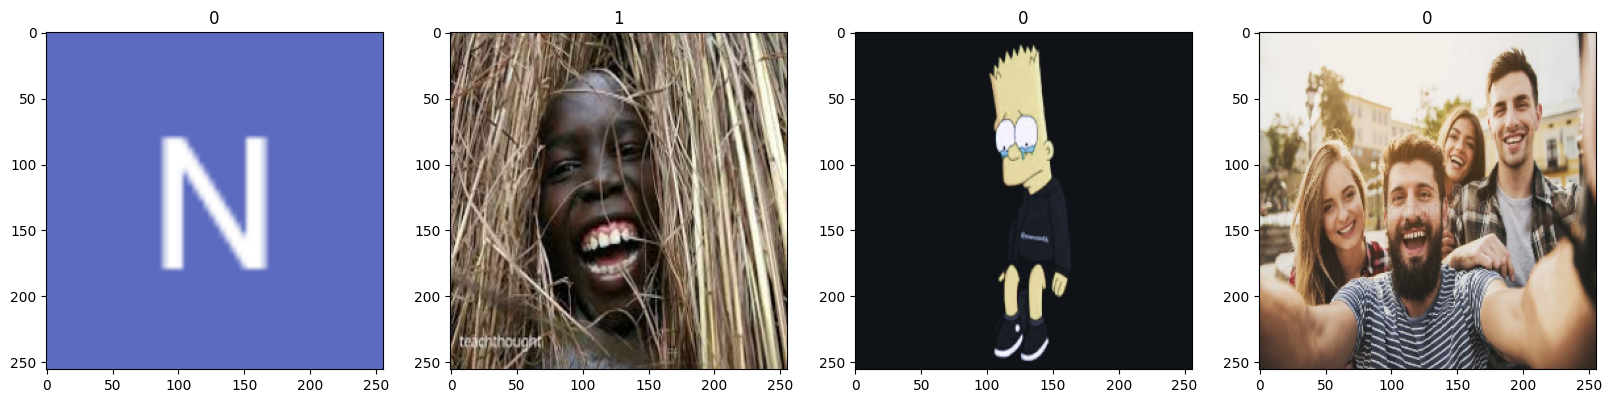

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x, y: (x/255, y))      # Speeding up the process of fetching and to transform (NORMALIZING) data using MAP

In [15]:
data.as_numpy_iterator().next()

(array([[[[7.80637264e-02, 9.37500000e-02, 9.76715684e-02],
          [5.30637242e-02, 6.87500015e-02, 7.26715699e-02],
          [3.39460783e-02, 4.96323518e-02, 5.35539202e-02],
          ...,
          [3.92156877e-02, 5.49019612e-02, 6.66666701e-02],
          [6.27451017e-02, 7.84313753e-02, 9.01960805e-02],
          [6.38480410e-02, 7.95343146e-02, 9.12990198e-02]],
 
         [[5.25735281e-02, 6.82598054e-02, 7.21813738e-02],
          [4.37499993e-02, 5.94362728e-02, 6.33578449e-02],
          [7.89215714e-02, 9.46078449e-02, 9.85294133e-02],
          ...,
          [6.94852918e-02, 8.51715654e-02, 9.69362780e-02],
          [5.31862751e-02, 6.88725486e-02, 8.06372538e-02],
          [7.68382326e-02, 9.25245062e-02, 1.04289219e-01]],
 
         [[4.75490205e-02, 6.32352978e-02, 6.71568662e-02],
          [7.76960775e-02, 9.33823511e-02, 9.73039195e-02],
          [7.75735304e-02, 9.32598040e-02, 9.71813723e-02],
          ...,
          [9.19117685e-03, 2.48774514e-02, 3.6642

In [16]:
train_size = int(len(data)* .7)
val_size = int(len(data)* .2) +1
test_size = int(len(data)* .1) +1            # Train, Val & Test SPLIT

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)  # Taking and Skipping batches

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [19]:
model = Sequential()                      # Giving Linear Sequence to CNN Layers

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))       # Input Layer with CONVOLUTION, 16 filters of size 3x3, 1 stride
model.add(MaxPooling2D())                                                           # Condensing the picture into smaller PIXELS

model.add(Conv2D(32, (3,3), 1, activation='relu'))                                  # Layer 2
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))                                  # Layer 3
model.add(MaxPooling2D())

model.add(Flatten())                                                                # End Result as SINGULAR VAL rather than pixels

model.add(Dense(256, activation='relu'))                                            # Dense layer with 256 neurons
model.add(Dense(1, activation='sigmoid'))                                           # Output Layer, Convert to a binary: 0 or 1

C:\Python 3.11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile('adam', loss= tf.losses.BinaryCrossentropy, metrics= ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)              # Saving checkpoint- Logging

In [23]:
hist = model.fit(train, epochs= 20, validation_data = val, callbacks = [tensorboard_callback])     # Training the model and logging  each EPOCH

Epoch 1/20


C:\Python 3.11\Lib\site-packages\keras\src\callbacks\tensorboard.py:668: UserWarning: Model failed to serialize as JSON. Ignoring... BinaryCrossentropy.get_config() missing 1 required positional argument: 'self'
  warnings.warn(f"Model failed to serialize as JSON. Ignoring... {exc}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.4416 - loss: 1.1536 - val_accuracy: 0.4815 - val_loss: 0.7241
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5195 - loss: 0.7057 - val_accuracy: 0.4815 - val_loss: 0.6947
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5179 - loss: 0.6933 - val_accuracy: 0.4815 - val_loss: 0.6935
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4937 - loss: 0.6940 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5438 - loss: 0.6931 - val_accuracy: 0.4815 - val_loss: 0.6932
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5067 - loss: 0.6932 - val_accuracy: 0.4691 - val_loss: 0.6934
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5160 - loss: 0.6928 - val_accuracy: 0.4691 - val_loss: 0.6935
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5070 - loss: 0.6931 - val_accuracy: 0.4815 - val_loss: 0.6931
Epoch 9/20
7/7 ━━━━━

In [24]:
hist.history

{'accuracy': [0.4508928656578064,
  0.5089285969734192,
  0.5044642686843872,
  0.4866071343421936,
  0.5178571343421936,
  0.5089285969734192,
  0.5044642686843872,
  0.5,
  0.5089285969734192,
  0.4955357015132904,
  0.5044642686843872,
  0.5089285969734192,
  0.5089285969734192,
  0.5089285969734192,
  0.5089285969734192,
  0.5089285969734192,
  0.5089285969734192,
  0.5089285969734192,
  0.5089285969734192,
  0.5133928656578064],
 'loss': [1.0533363819122314,
  0.6994608044624329,
  0.6929708123207092,
  0.6936736702919006,
  0.6932502388954163,
  0.6930726766586304,
  0.6930255889892578,
  0.6931225657463074,
  0.6930685043334961,
  0.6933190226554871,
  0.6932533979415894,
  0.692926287651062,
  0.6931008100509644,
  0.6930674314498901,
  0.6928445100784302,
  0.6930939555168152,
  0.6929066777229309,
  0.6930579543113708,
  0.6927674412727356,
  0.693359375],
 'val_accuracy': [0.48148149251937866,
  0.48148149251937866,
  0.48148149251937866,
  0.4938271641731262,
  0.4814814925

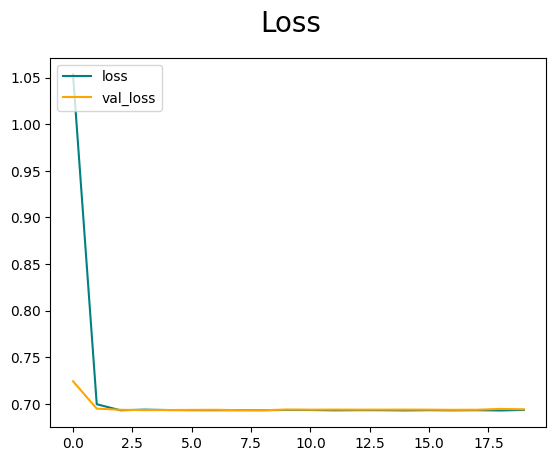

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color= 'teal', label= 'loss')             # Training LOSS
plt.plot(hist.history['val_loss'], color= 'orange', label= 'val_loss')   # Validation LOSS
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

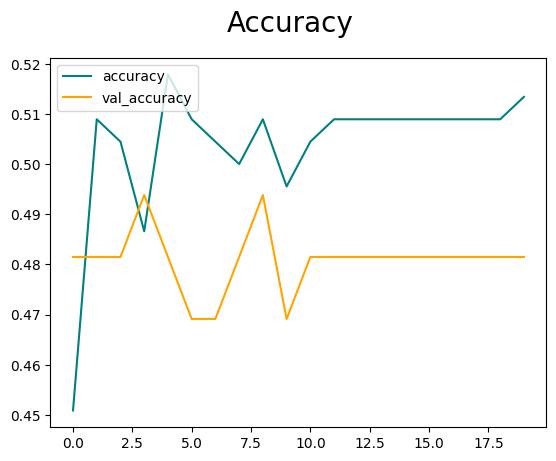

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color= 'teal', label = 'accuracy')                 # Training ACCURACY 
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')      # Validation ACCURACY
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy      # Accuracy Metrics

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator():                # Loo to run through batches
    X, y = batch                                      # X: actual img, y:label
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)                          # update metrics

In [30]:
print(f'Precision{pre.result().numpy()}, Recall{re.result().numpy}, Accuracy{acc.result().numpy()}')

Precision0.0, Recall<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.0>>, Accuracy0.0


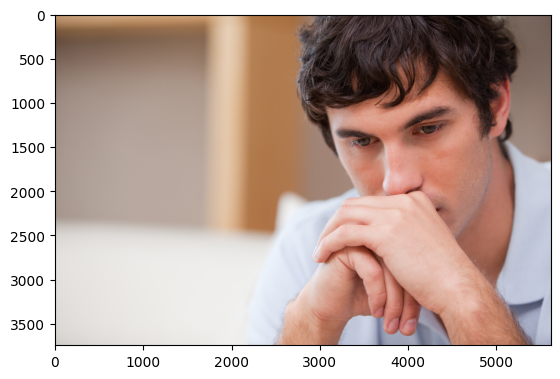

In [31]:
img = cv2.imread('Saddest.jpg')                           # Test Image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))          # Colour Conversion
plt.show()

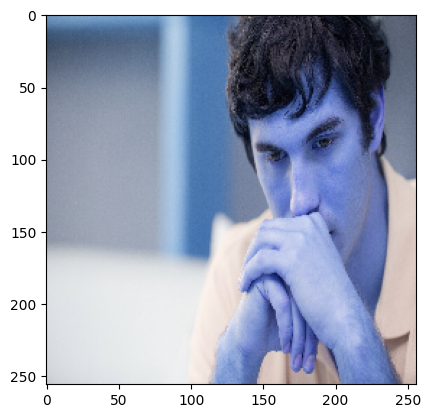

In [32]:
resize = tf.image.resize(img, (256, 256))      # Resizing before giving to NN
plt.imshow(resize.numpy().astype(int))
plt.show()

In [33]:
np.expand_dims(resize, 0).shape            # Adding an extra dimension

(1, 256, 256, 3)

In [34]:
yhat = model.predict(np.expand_dims(resize/255, 0))   #Scaling the PREDICTION

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [35]:
yhat

array([[0.49276882]], dtype=float32)

In [36]:
if yhat > 0.5:
    print(f'Prdicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [37]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join)